In [ ]:
import sys
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import backend

In [2]:
import pandas as pd
import numpy as np

In [3]:
#GPU 옵션
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
#X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
#X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#Y_train = np_utils.to_categorical(Y_train)
#Y_test = np_utils.to_categorical(Y_test)
###

In [6]:
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


#num_classes = 10


Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
#input data 가시화
df_data=mnist.load_data()


In [8]:
print(X_train.shape)
print(Y_train.shape)
#Y_train.head()

(60000, 28, 28, 1)
(60000, 10)


In [9]:
#model = Sequential()
#model.add(Dense(units=64, input_dim=28*28, activation='relu'))
#model.add(Dense(units=10, activation='softmax'))


In [11]:
#CNN 구현
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
__________

In [12]:
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.fit(X_train, Y_train, epochs=5, batch_size=32)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=50,
                 verbose=1, 
                 validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.4063 - acc: 0.8750 - val_loss: 0.0756 - val_acc: 0.9763
Epoch 2/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.1545 - acc: 0.9543 - val_loss: 0.0545 - val_acc: 0.9820
Epoch 3/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1172 - acc: 0.9656 - val_loss: 0.0421 - val_acc: 0.9863
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0985 - acc: 0.9711 - val_loss: 0.0349 - val_acc: 0.9893
Epoch 5/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0871 - acc: 0.9742 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 6/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0782 - acc: 0.9767 - val_loss: 0.0291 - val_acc: 0.9899
Epoch 7/50
60000/60000 [==============================] - 2s 42us/step - loss: 0

In [14]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

10000/10000 [==============================] - 0s 42us/step


In [15]:
print('loss_and_metrics : ' + str(loss_and_metrics))

loss_and_metrics : [0.02354270714754375, 0.9944]


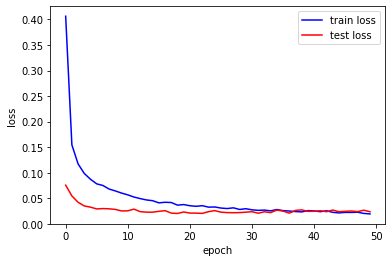

In [16]:
#loss graph 그리기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

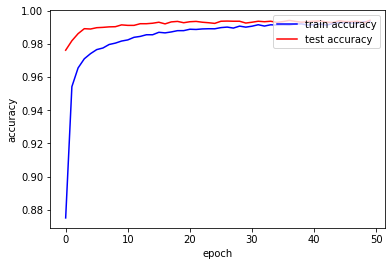

In [17]:
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['acc'], 'b', label='train accuracy')
loss_ax.plot(hist.history['val_acc'], 'r', label='test accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')

plt.show()


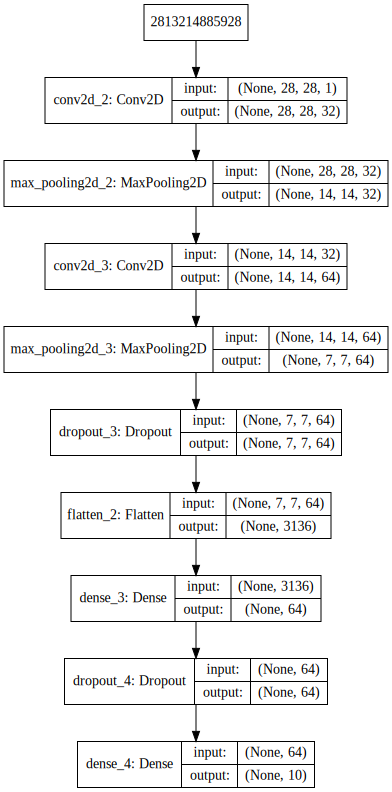

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))